<a href="https://colab.research.google.com/github/isabelsanttana/IA/blob/main/busca_heuristica_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<?xml version="1.0" encoding="UTF-8"?>
<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://www.uvv.br/wp-content/themes/uvvBr/templates/assets//img/logouvv.svg" alt="UVV-LOGO" style = width="100px"; height="100px">
        </CENTER>    
        <CENTER><b>Inteligência Artificial</b><br/>
        <CENTER><b>Prof: Erlon Pinheiro</b>
        <CENTER><b>Trabalho 2</b><br/></CENTER><br/>


***
# Descrição do trabalho
- Implementar o código da busca heurística para
encontrar a menor distância entre duas cidades
do ES.
-  Usar o Algoritmo A* e a Busca Gulosa.

***

In [ ]:
import numpy as np

class Cidade:
    def __init__(self, nome, distanciaObjetivo): 
        self.nome = nome
        self.distanciaObjetivo = distanciaObjetivo # -> Distancia Heuristica até o destino escolhido

    def getCidade(self):
        return self.nome

    def getDistanciaObjetivo(self):
        return self.distanciaObjetivo

    def custoEstimativo(self,g): # Função para calcular o custo estimativo -> F(n)= G(n) + H(n)
        g = g
        h = self.distanciaObjetivo
        return g + h

In [ ]:
# Criação das cidades que serão usadas no grafo

Guarapari = Cidade("Guarapari", 218)
Domingos_Martins = Cidade("Domingos Martins", 208)
Vila_Velha = Cidade("Vila Velha", 161)
Serra = Cidade("Serra", 134)
Jetiba = Cidade("Jetiba", 160)
Fundao = Cidade("Fundão", 105)
Sao_Roque = Cidade("São Roque", 76) 
Joao_Neiva = Cidade("João Neiva", 80) 
Aracruz = Cidade("Aracruz", 84) 
Marilandia = Cidade("Marilandia", 95)
Pancas = Cidade("Pancas", 147)
Rio_Bananal = Cidade("Rio Bananal", 69)
Linhares = Cidade("Linhares", 25)
Sooretama = Cidade("Sooretama", 0)

# CIDADE = [[FILHO, DISTANCIA_PAI], [FILHO, DISTANCIA_PAI]]
grafo = {
    'Guarapari': [[Vila_Velha, 51], [Domingos_Martins, 65]],
    'Domingos Martins': [[Guarapari, 65], [Vila_Velha, 50], [Fundao, 103], [Jetiba, 60]],
    'Vila Velha': [[Serra, 30], [Domingos_Martins, 50], [Guarapari, 51]],
    'Serra': [[Fundao, 27], [Jetiba, 82], [Vila_Velha, 30]],
    'Jetiba': [[Domingos_Martins, 60], [Serra, 82], [Fundao, 54], [Sao_Roque, 43]],
    'Fundão': [[Serra, 27], [Domingos_Martins, 103], [Jetiba, 54], [Sao_Roque, 59], [Joao_Neiva, 25], [Aracruz, 30]],
    'São Roque': [[Jetiba, 43], [Fundao, 59], [Joao_Neiva, 67], [Marilandia, 54], [Pancas, 87]],
    'João Neiva': [[Fundao, 25], [Sao_Roque, 67], [Aracruz, 22], [Marilandia, 71], [Rio_Bananal, 100], [Linhares, 59]],
    'Aracruz': [[Fundao, 30], [Joao_Neiva, 22], [Linhares, 61]],
    'Marilandia': [[Joao_Neiva, 71], [Sao_Roque, 54], [Pancas, 58], [Rio_Bananal, 43], [Linhares, 70]],
    'Pancas': [[Sao_Roque, 87], [Marilandia, 58], [Rio_Bananal, 82], [Sooretama, 147]],
    'Rio Bananal': [[Joao_Neiva, 100], [Marilandia, 43], [Linhares, 45], [Pancas, 82], [Sooretama, 69]],
    'Linhares': [[Aracruz, 61], [Joao_Neiva, 59], [Marilandia, 70], [Rio_Bananal, 45], [Sooretama, 24]],
    'Sooretama': [[Pancas, 147], [Rio_Bananal, 69], [Linhares, 24]]
}

In [ ]:
def buscaGulosa(graph, inicio, meta):

    visitado = set()
    fila = [inicio]
    custo = 0

    while fila:

        # Pega o primeiro elemento da fila
        node = fila.pop(0)

        # Caso o node não esteja no set visitado...
        if node not in visitado:

            # Ele é adicioando ao set
            visitado.add(node)

            # Printar o node atual
            print(f'--> {node}')

            # Se o node for o destino final, o código para
            if node == meta:
                print(f'\nDistância total percorrida pela busca gulosa: {custo} km')
                return 
                
            proxNode = Cidade('', np.Infinity)

            # Adiciona na fila o filho com menor caminho heuristico
            for filho in graph[node]:
                # Pega a cidade da lista atual
                cidadeAtual = filho[0]
                

                # Verifica se o filho já foi visitado
                if cidadeAtual.getCidade() not in visitado:

                    # Analisa qual filho tem a menor distancia pro destino
                    if cidadeAtual.getDistanciaObjetivo() < proxNode.getDistanciaObjetivo():
                        proxNode = cidadeAtual
                        custoPercorrido = filho[1]
                        
                        
            # Adiciona a lista o filho que não foi visitado e possui a menor distancia ao destino
            fila.append(proxNode.getCidade())
            custo += custoPercorrido


def buscaAEstrela(graph, inicio, meta): 
    visitado = set()
    fila = [inicio]
    g = 0  # custo já percorrido iniciando com 0

    while fila:

      node = fila.pop(0)

      if node not in visitado:

        visitado.add(node)

        # Printar o node atual
        print(f'--> {node}')

        # Se o node for o destino final, o código para
        if node == meta:
            print(f'\nDistância total percorrida pela busca A*: {g} km\n')
            return 
            
        proxNode = [Cidade('', np.Infinity), np.Infinity] # [cidade, custo] 

        # Adiciona na fila o filho com a menor estimativa de custo usando a formula f(N) = g(N) + h(N)
        for filho in graph[node]:

            # Pega o primeiro filho
            cidadeAtual = filho[0] 
            custoCidadeAtual = filho[1] # Custo percorrido do pai para o filho

            # Verifica se o filho já foi visitado
            if cidadeAtual.getCidade() not in visitado:

                # Analisa qual filho tem o menor custo estimado para o destino
                if cidadeAtual.custoEstimativo(custoCidadeAtual + g) < proxNode[0].custoEstimativo(proxNode[1] + g):
                    proxNode = [cidadeAtual,custoCidadeAtual]

        # Adiciona a lista o filho que não foi visitado e possui o menor custo estimado ate o destino
        fila.append(proxNode[0].getCidade())     
        print(f'Distância percorrida: {g} km\n')
        g += proxNode[1] # adiciona o custo percorrido na variavel g


In [ ]:
# Busca gulosa com partida de Guarapari
buscaGulosa(grafo, 'Guarapari', 'Sooretama')

--> Guarapari
--> Vila Velha
--> Serra
--> Fundão
--> São Roque
--> João Neiva
--> Linhares
--> Sooretama

Distância total percorrida pela busca gulosa: 317 km


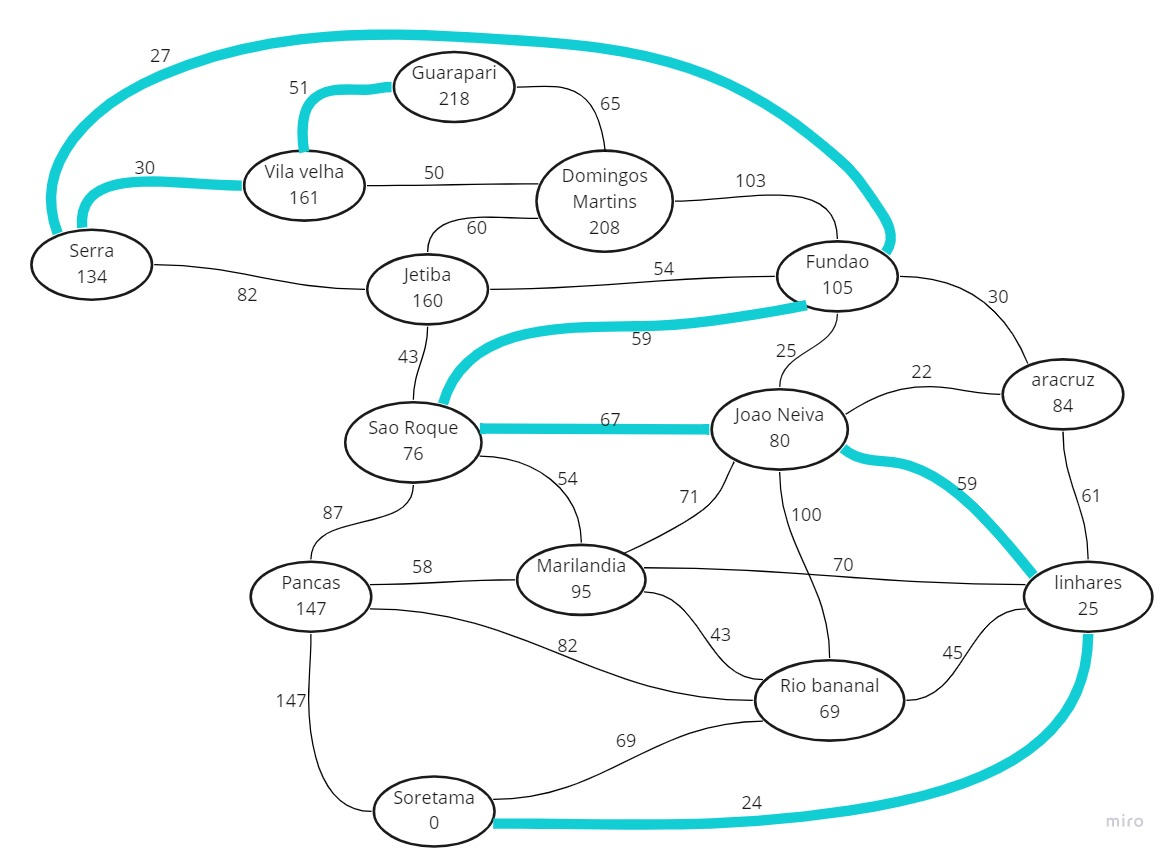

In [ ]:
# Busca A* com partida de Guarapari
buscaAEstrela(grafo, 'Guarapari', 'Sooretama')

--> Guarapari
Distância percorrida: 0 km

--> Vila Velha
Distância percorrida: 51 km

--> Serra
Distância percorrida: 81 km

--> Fundão
Distância percorrida: 108 km

--> João Neiva
Distância percorrida: 133 km

--> Linhares
Distância percorrida: 192 km

--> Sooretama

Distância total percorrida pela busca A*: 216 km



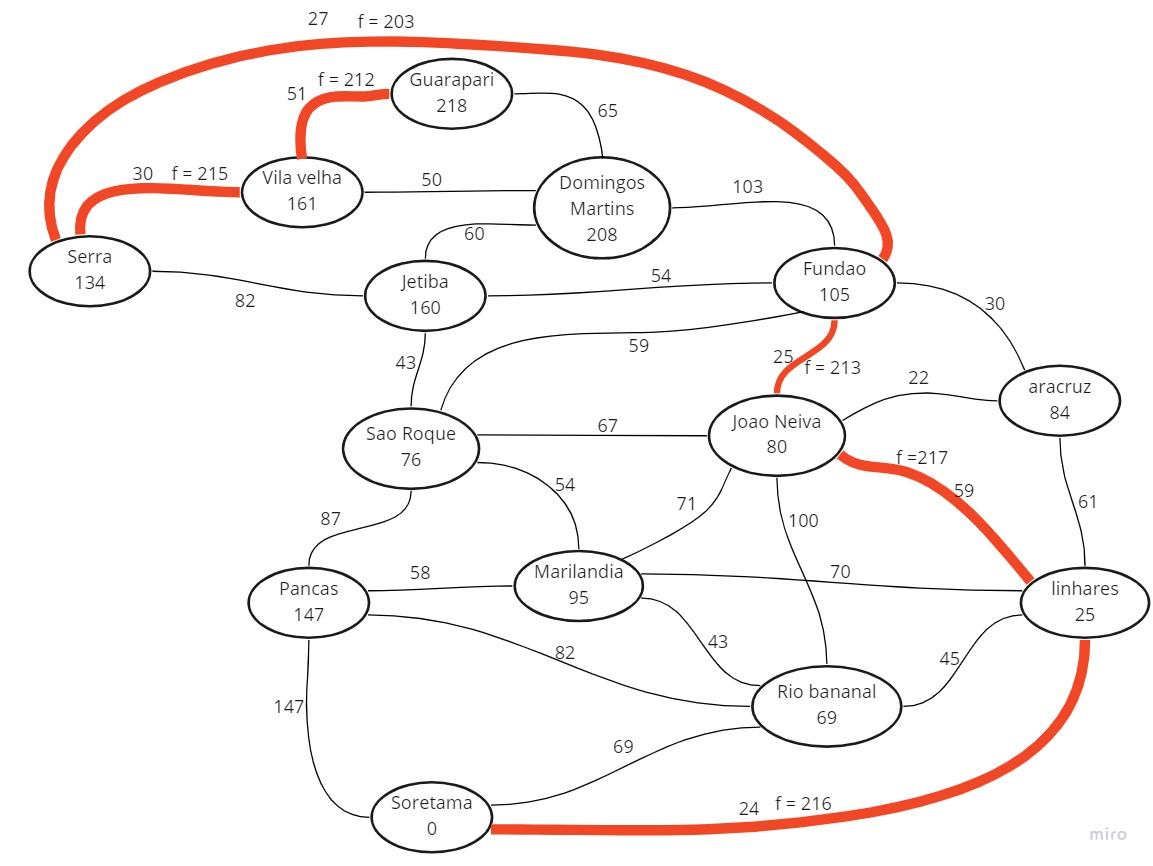

# Menu interativo 'Achador de rotas 2000x EVOLUTION'
É o ano da virada

In [ ]:
try:

    while True:
        print('\n################################\n')
        print('ACHADOR DE ROTAS 2000x EVOLUTION\n')
        print('################################\n\n')

        print('1 - Ver cidades disponíveis')
        print('2 - Usar a busca gulosa')
        print('3 - Usar a busca A*')
        print('4 - Sair\n')

        opcao = int(input('Selecione uma opção: '))
        while opcao != 1 and opcao != 2 and opcao != 3 and opcao != 4:
            print('\nOpção inválida. Tente novamente\n')
            opcao = int(input('Selecione uma opção: '))

        if opcao == 4:
            print('\nFechando programa. Até mais!')
            break
            
        else:
            
            if opcao == 1:
                print('')
                for key in sorted(grafo):
                    print(f'--> {key}')

            elif opcao == 2:
                print('\nAviso: Escreva o nome da cidade do mesmo modo apresentado na lista de cidades.')
                print('A cidade de destino será Sooretama.\n')

                inicio = input('Qual é a cidade de origem? ') 
                while inicio not in grafo.keys():
                    print('\nCidade de origem inválida. Tente novamente.\n')
                    inicio = input('Qual é a cidade de origem? ')  

                print('\nAchando a rota pela busca gulosa...\n')
                buscaGulosa(grafo, inicio, 'Sooretama')

            else:
                print('\nAviso: Escreva o nome da cidade do mesmo modo apresentado na lista de cidades.')
                print('A cidade de destino será Sooretama.\n')

                inicio = input('Qual é a cidade de origem? ') 
                while inicio not in grafo.keys():
                    print('\nCidade de origem inválida. Tente novamente.\n')
                    inicio = input('Qual é a cidade de origem? ') 

                print('\nAchando a rota pela busca A*...\n')
                buscaAEstrela(grafo, inicio, 'Sooretama')

except:
    print('\nAlgo de errado não está certo... Reinicie o programa novamente.\n')


################################

ACHADOR DE ROTAS 2000x EVOLUTION

################################


1 - Ver cidades disponíveis
2 - Usar a busca gulosa
3 - Usar a busca A*
4 - Sair

Selecione uma opção: 1

--> Aracruz
--> Domingos Martins
--> Fundão
--> Guarapari
--> Jetiba
--> João Neiva
--> Linhares
--> Marilandia
--> Pancas
--> Rio Bananal
--> Serra
--> Sooretama
--> São Roque
--> Vila Velha

################################

ACHADOR DE ROTAS 2000x EVOLUTION

################################


1 - Ver cidades disponíveis
2 - Usar a busca gulosa
3 - Usar a busca A*
4 - Sair

Selecione uma opção: 2

Aviso: Escreva o nome da cidade do mesmo modo apresentado na lista de cidades.
A cidade de destino será Sooretama.

Qual é a cidade de origem? djfshdf

Cidade de origem inválida. Tente novamente.

Qual é a cidade de origem? Guarapari

Achando a rota pela busca gulosa...

--> Guarapari
--> Vila Velha
--> Serra
--> Fundão
--> São Roque
--> João Neiva
--> Linhares
--> Sooretama

Distância